In [1]:
import csv
import pandas as pd
import numpy as np
import re

import sqlite3
engine = sqlite3.connect('HW1_DB')

airlines_df = pd.read_sql('select * from airlines', engine)
airports_df = pd.read_sql('select * from airports', engine)
routes_df = pd.read_sql('select * from routes', engine)
incidents_df = pd.read_sql('select * from incidents', engine)


In [2]:
aug_flights_df = pd.read_csv('https://www.cis.upenn.edu/~cis545/data/Flights-Aug-2016.csv')

In [3]:
sep_flights_df = pd.read_csv('https://www.cis.upenn.edu/~cis545/data/Flights-Sep-2016.csv')

In [4]:
oct_flights_df = pd.read_csv('https://www.cis.upenn.edu/~cis545/data/Flights-Oct-2016.csv')

In [5]:
import sqlite3
engine = sqlite3.connect('HW1_DB')
aug_flights_df.to_sql('flights_advanced', engine, if_exists='replace')
sep_flights_df.to_sql('flights_advanced', engine, if_exists='append')
oct_flights_df.to_sql('flights_advanced', engine, if_exists='append')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


# Step 6.1

In [6]:
row_count = pd.read_sql('SELECT count(*) FROM flights_advanced', engine)
#df = pd.read_sql('select * from flights_advanced', engine)
row_count

,count(*)
0,1425851


# Step 6.2.1

In [7]:
#output_df = pd.read_sql('SELECT * FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier, routes.source_airport_icao = flights_advanced.Origin,routes.dest_airport_icao = flights_advanced.Dest;', engine)
output_df = pd.read_sql('SELECT airline_iata, dest_airport_icao, COUNT(dest_airport_icao) AS count FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier AND routes.source_airport_icao = flights_advanced.Origin AND routes.dest_airport_icao = flights_advanced.Dest GROUP BY airline_iata, dest_airport_icao ORDER BY count DESC LIMIT 60', engine)
#output_df.head()
#routes_df
output_df

,airline_iata,dest_airport_icao,count
0,DL,ATL,63488
1,AA,DFW,35063
2,AA,CLT,24095
3,UA,ORD,20289
4,WN,MDW,19201
5,WN,LAS,18723
6,DL,MSP,17114
7,WN,BWI,16471
8,WN,DEN,16455
9,AA,ORD,15731


# Step 6.2.2

In [8]:
output_df = pd.read_sql('SELECT airline_iata, dest_airport_icao, COUNT(dest_airport_icao) AS count FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier AND routes.source_airport_icao = flights_advanced.Origin AND routes.dest_airport_icao = flights_advanced.Dest WHERE flights_advanced.ArrDelayMinutes >= 30 OR flights_advanced.Cancelled > 0 GROUP BY airline_iata, dest_airport_icao ORDER BY count DESC LIMIT 60', engine)

output_df

,airline_iata,dest_airport_icao,count
0,DL,ATL,4539
1,AA,DFW,4114
2,UA,ORD,2641
3,UA,SFO,2473
4,AA,ORD,2337
5,AA,CLT,1951
6,UA,EWR,1920
7,AA,MIA,1879
8,B6,BOS,1774
9,WN,LAX,1678


# Step 6.2.3

In [14]:
output_df = pd.read_sql('SELECT airline_iata, dest_airport_icao, COUNT(dest_airport_icao) AS count FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier AND routes.source_airport_icao = flights_advanced.Origin AND routes.dest_airport_icao = flights_advanced.Dest WHERE flights_advanced.ArrDelayMinutes >= 30 OR flights_advanced.Cancelled > 0 GROUP BY airline_iata, dest_airport_icao HAVING count >= 1000', engine)
output_df

,airline_iata,dest_airport_icao,count
0,AA,BOS,1115
1,AA,CLT,1951
2,AA,DFW,4114
3,AA,LAX,1441
4,AA,LGA,1103
5,AA,MIA,1879
6,AA,ORD,2337
7,AA,PHL,1208
8,AA,PHX,1464
9,B6,BOS,1774


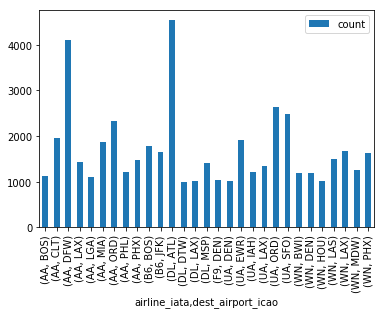

In [15]:
import matplotlib.pyplot as plt
output_df.plot(x= ['airline_iata', 'dest_airport_icao'], y = 'count', kind = 'bar')
plt.show()

# Step 6.3.1

In [16]:
sep_flights_df.head(100)

,Year,Month,DayofMonth,Carrier,FlightNum,Origin,OriginCity,OriginState,Dest,DestCity,DestState,DepTime,ArrTime,ArrDelayMinutes,Cancelled,Unnamed: 15
0,2016,9,1,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,551.0,652.0,0.0,0.0,NaN
1,2016,9,2,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,552.0,709.0,0.0,0.0,NaN
2,2016,9,6,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,556.0,656.0,0.0,0.0,NaN
3,2016,9,8,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,552.0,648.0,0.0,0.0,NaN
4,2016,9,9,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,552.0,654.0,0.0,0.0,NaN
5,2016,9,12,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,632.0,734.0,19.0,0.0,NaN
6,2016,9,13,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,554.0,716.0,1.0,0.0,NaN
7,2016,9,15,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,611.0,708.0,0.0,0.0,NaN
8,2016,9,16,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,633.0,739.0,24.0,0.0,NaN
9,2016,9,19,AA,1,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,600.0,713.0,0.0,0.0,NaN


In [17]:
#This dataframe joins valid routes
hops_df = pd.read_sql('SELECT airline_iata, source_airport_icao, dest_airport_icao, DepTime, ArrTime, flights_advanced.Year, flights_advanced.Month, flights_advanced.DayofMonth FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier AND routes.source_airport_icao = flights_advanced.Origin AND routes.dest_airport_icao = flights_advanced.Dest WHERE flights_advanced.DayofMonth < 9 AND flights_advanced.Month = 9', engine)
hops_df.to_sql('hops', engine, if_exists='replace')

engine.execute('CREATE index my_index ON hops(airline_iata,source_airport_icao,dest_airport_icao,DepTime,ArrTime)')

#This dataframe contains only the direct flights from LAX to DEN
direct_route_df = pd.read_sql("SELECT * FROM hops WHERE (source_airport_icao = 'LAX' AND dest_airport_icao = 'DEN') ORDER BY DepTime", engine)
direct_route_df.to_sql('direct_route', engine, if_exists='replace')
direct_route_df


,index,airline_iata,source_airport_icao,dest_airport_icao,DepTime,ArrTime,Year,Month,DayofMonth
0,61643,UA,LAX,DEN,529.0,834.0,2016,9,3
1,51789,UA,LAX,DEN,537.0,900.0,2016,9,8
2,60096,UA,LAX,DEN,538.0,845.0,2016,9,4
3,54112,UA,LAX,DEN,540.0,855.0,2016,9,7
4,54393,UA,LAX,DEN,541.0,855.0,2016,9,5
5,60454,UA,LAX,DEN,541.0,843.0,2016,9,2
6,55688,UA,LAX,DEN,543.0,849.0,2016,9,6
7,62522,UA,LAX,DEN,545.0,848.0,2016,9,1
8,65208,WN,LAX,DEN,552.0,858.0,2016,9,2
9,80194,WN,LAX,DEN,556.0,910.0,2016,9,6


In [18]:
#This dataframe joins valid routes
hops_df = pd.read_sql('SELECT airline_iata, source_airport_icao, dest_airport_icao, DepTime, ArrTime, flights_advanced.Year, flights_advanced.Month, flights_advanced.DayofMonth FROM routes JOIN flights_advanced ON routes.airline_iata = flights_advanced.Carrier AND routes.source_airport_icao = flights_advanced.Origin AND routes.dest_airport_icao = flights_advanced.Dest WHERE flights_advanced.DayofMonth < 9 AND flights_advanced.Month = 9', engine)
hops_df.to_sql('hops', engine, if_exists='replace')

#This dataframe filters flights that either start on LAX OR end in DEN
hops_df = pd.read_sql("SELECT airline_iata, source_airport_icao, dest_airport_icao, DepTime, MIN(ArrTime) AS ArrTime, Year, Month, DayofMonth FROM hops WHERE (source_airport_icao = 'LAX' OR dest_airport_icao = 'DEN') AND DepTime IS NOT NULL GROUP BY DepTime ORDER BY DepTime", engine)
hops_df.to_sql('hops', engine, if_exists='replace')

engine.execute('CREATE index my_index ON hops(airline_iata,source_airport_icao,dest_airport_icao,DepTime,ArrTime)')

#This dataframe has possible flight connections from LAX to DEN that depart and arrive on the same day.
hops_df = pd.read_sql("SELECT s1.source_airport_icao AS Origin, s1.DepTime AS Initial_departure, s2.source_airport_icao AS Layover, s1.ArrTime AS Arrive_layover, s2.DepTime AS Depart_Layover, s2.dest_airport_icao AS Destination, s2.ArrTime AS Final_arrival, s1.Year, s1.Month, s1.DayofMonth FROM hops AS s1 JOIN hops AS s2 ON s1.dest_airport_icao = s2.source_airport_icao WHERE (((s1.ArrTime+100) <= s2.DepTime) AND (s2.DepTime < s2.ArrTime) AND (s1.DepTime < s1.ArrTime))", engine)
hops_df.to_sql('hops', engine, if_exists='replace')


#This is the final dataframe.
hops_df = pd.read_sql("SELECT s1.Origin, s1.Destination AS Dest, (2) AS Hops, s1.Layover, s1.Initial_departure AS DepTime, s1.Final_arrival AS ArrTime, s1.Year, s1.Month, s1.DayofMonth FROM hops AS s1, direct_route AS s2 WHERE ((s1.Initial_departure = s2.DepTime) AND (s1.Final_arrival <= s2.ArrTime))", engine)
hops_df.to_sql('hops', engine, if_exists='replace')

#Origin,Dest,Hops,DepTime,ArrTime,Year,Month,DayofMonth



hops_df


,Origin,Dest,Hops,Layover,DepTime,ArrTime,Year,Month,DayofMonth
